In [1]:
import import_ipynb
from DataProcessing import Data
from xgboost_impl import Xgboost
from catboost_impl import CatBoost

import os
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

from sklearn.metrics import mean_absolute_error

importing Jupyter notebook from DataProcessing.ipynb


/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 9.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


importing Jupyter notebook from xgboost_impl.ipynb
importing Jupyter notebook from catboost_impl.ipynb


In [2]:
train_a = pd.read_parquet('dataset/A/train_targets.parquet')
train_b = pd.read_parquet('dataset/B/train_targets.parquet')
train_c = pd.read_parquet('dataset/C/train_targets.parquet')

X_train_observed_a = pd.read_parquet('dataset/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('dataset/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('dataset/C/X_train_observed.parquet')

X_train_estimated_a = pd.read_parquet('dataset/A/X_train_estimated.parquet') 
X_train_estimated_b = pd.read_parquet('dataset/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('dataset/C/X_train_estimated.parquet')

X_test_estimated_a = pd.read_parquet('dataset/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('dataset/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('dataset/C/X_test_estimated.parquet')

In [3]:
data = Data(train_a, train_b, train_c, X_train_observed_a, X_train_observed_b, X_train_observed_c,
                      X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_test_estimated_a, 
                      X_test_estimated_b, X_test_estimated_c)

<string>:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


tsfresh feature extraction on building A


<string>:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Feature Extraction: 100%|██████████| 40/40 [00:02<00:00, 18.91it/s]
/opt/conda/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['global_rad:W__mean_abs_change' 'global_rad:W__mean_change'
 'global_rad:W__mean_second_derivative_central' 'global_rad:W__skewness'
 'global_rad:W__kurtosis' 'global_rad:W__autocorrelation__lag_0'
 'global_rad:W__autocorrelation__lag_1'
 'global_rad:W__autocorrelation__lag_2'
 'global_rad:W__autocorrelation__lag_3'
 'global_rad:W__autocorrelation__lag_4'
 'global_rad:W__autocorrelation__lag_5'
 'global_rad:W__autocorrelation__lag_6'
 'global_rad:W__autocorrelation__lag_7'
 'global_rad:W__autocorrelation__lag_

tsfresh feature extraction on building B


Feature Extraction: 100%|██████████| 40/40 [00:02<00:00, 18.43it/s]
/opt/conda/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['global_rad:W__mean_abs_change' 'global_rad:W__mean_change'
 'global_rad:W__mean_second_derivative_central' 'global_rad:W__skewness'
 'global_rad:W__kurtosis' 'global_rad:W__autocorrelation__lag_0'
 'global_rad:W__autocorrelation__lag_1'
 'global_rad:W__autocorrelation__lag_2'
 'global_rad:W__autocorrelation__lag_3'
 'global_rad:W__autocorrelation__lag_4'
 'global_rad:W__autocorrelation__lag_5'
 'global_rad:W__autocorrelation__lag_6'
 'global_rad:W__autocorrelation__lag_7'
 'global_rad:W__autocorrelation__lag_8'
 'global_rad:W__autocorrelation__lag_9'
 'global_rad:W__partial_autocorrelation__lag_0'
 'global_rad:W__partial_autocorrelation__lag_1'
 'global_rad:W__partial_autocorrelation__lag_2'
 'global_rad:W__partial_autocorrelation__lag_3'
 'global_rad:W__partial_autocorrelation__lag_4'
 'global_rad:W__par

tsfresh feature extraction on building C


Feature Extraction: 100%|██████████| 40/40 [00:02<00:00, 19.15it/s]
/opt/conda/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['global_rad:W__mean_abs_change' 'global_rad:W__mean_change'
 'global_rad:W__mean_second_derivative_central' 'global_rad:W__skewness'
 'global_rad:W__kurtosis' 'global_rad:W__autocorrelation__lag_0'
 'global_rad:W__autocorrelation__lag_1'
 'global_rad:W__autocorrelation__lag_2'
 'global_rad:W__autocorrelation__lag_3'
 'global_rad:W__autocorrelation__lag_4'
 'global_rad:W__autocorrelation__lag_5'
 'global_rad:W__autocorrelation__lag_6'
 'global_rad:W__autocorrelation__lag_7'
 'global_rad:W__autocorrelation__lag_8'
 'global_rad:W__autocorrelation__lag_9'
 'global_rad:W__partial_autocorrelation__lag_0'
 'global_rad:W__partial_autocorrelation__lag_1'
 'global_rad:W__partial_autocorrelation__lag_2'
 'global_rad:W__partial_autocorrelation__lag_3'
 'global_rad:W__partial_autocorrelation__lag_4'
 'global_rad:W__par

In [4]:
xg = Xgboost(data)
cb = CatBoost(data)

In [5]:
#xg.fit()

In [ ]:
cb.fit()

0:	learn: 848.1829082	test: 772.2632899	best: 772.2632899 (0)	total: 83.5ms	remaining: 2m 46s
1:	learn: 834.6748533	test: 760.3284351	best: 760.3284351 (1)	total: 112ms	remaining: 1m 51s
2:	learn: 821.5238171	test: 748.6662091	best: 748.6662091 (2)	total: 141ms	remaining: 1m 33s
3:	learn: 808.4045113	test: 737.0493854	best: 737.0493854 (3)	total: 169ms	remaining: 1m 24s
4:	learn: 795.5645932	test: 725.6689507	best: 725.6689507 (4)	total: 199ms	remaining: 1m 19s
5:	learn: 783.1005159	test: 714.7601385	best: 714.7601385 (5)	total: 231ms	remaining: 1m 16s
6:	learn: 770.9891542	test: 704.1925356	best: 704.1925356 (6)	total: 263ms	remaining: 1m 14s
7:	learn: 758.9485580	test: 693.5569289	best: 693.5569289 (7)	total: 292ms	remaining: 1m 12s
8:	learn: 747.2996013	test: 683.3053444	best: 683.3053444 (8)	total: 320ms	remaining: 1m 10s
9:	learn: 735.8231086	test: 673.2140039	best: 673.2140039 (9)	total: 347ms	remaining: 1m 9s
10:	learn: 724.6368406	test: 663.2689075	best: 663.2689075 (10)	total:

In [ ]:
#predictions_xg = xg.predict()
predictions_cb = cb.predict()

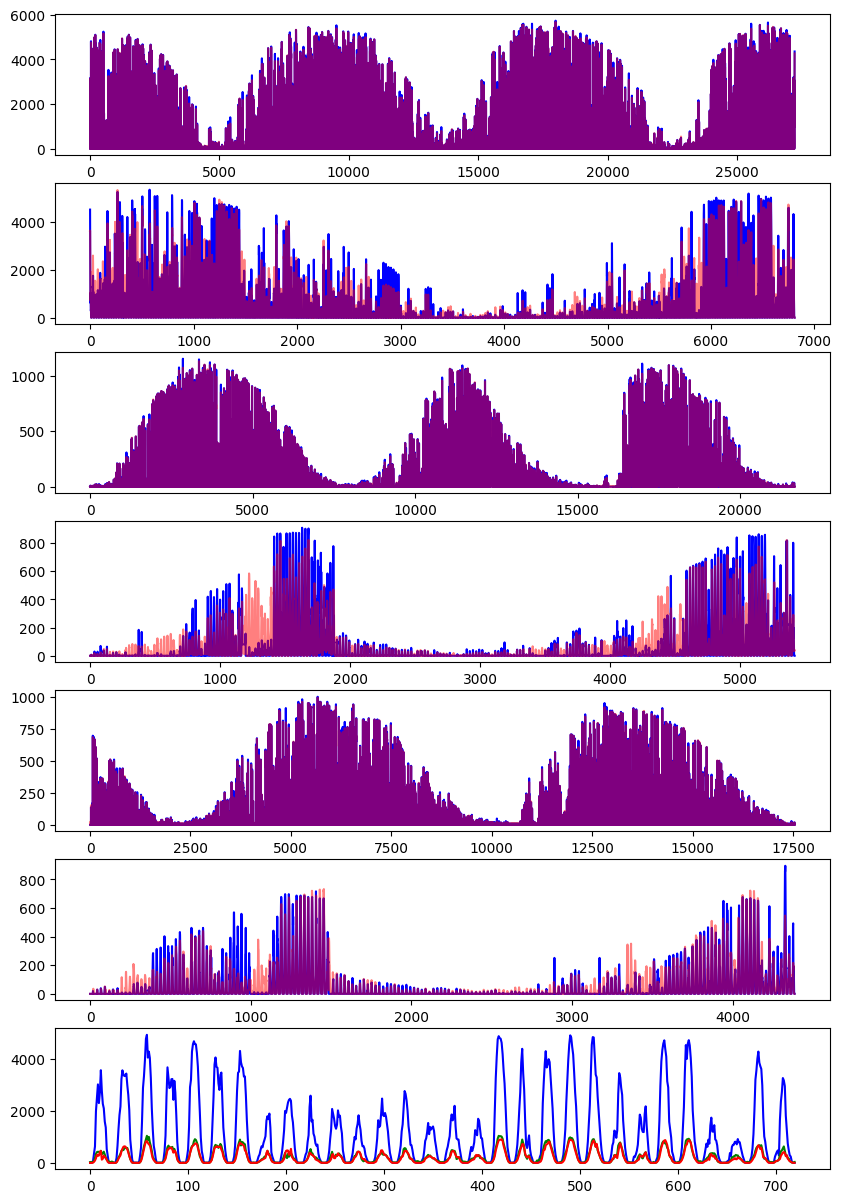

In [10]:
fig, axs = plt.subplots(7, figsize=(10, 15))

axs[0].plot(data.A.train_y, color="blue")
axs[0].plot(predictions_xg[0][0], color="red", alpha=0.5)

axs[1].plot(data.A.val_y, color="blue")
axs[1].plot(predictions_xg[0][1], color="red", alpha=0.5)

axs[2].plot(data.B.train_y, color="blue")
axs[2].plot(predictions_xg[1][0], color="red", alpha=0.5)

axs[3].plot(data.B.val_y, color="blue")
axs[3].plot(predictions_xg[1][1], color="red", alpha=0.5)

axs[4].plot(data.C.train_y, color="blue")
axs[4].plot(predictions_xg[2][0], color="red", alpha=0.5)

axs[5].plot(data.C.val_y, color="blue")
axs[5].plot(predictions_xg[2][1], color="red", alpha=0.5)

axs[6].plot(predictions_xg[0][2], color="blue")
axs[6].plot(predictions_xg[1][2], color="green")
axs[6].plot(predictions_xg[2][2], color="red")


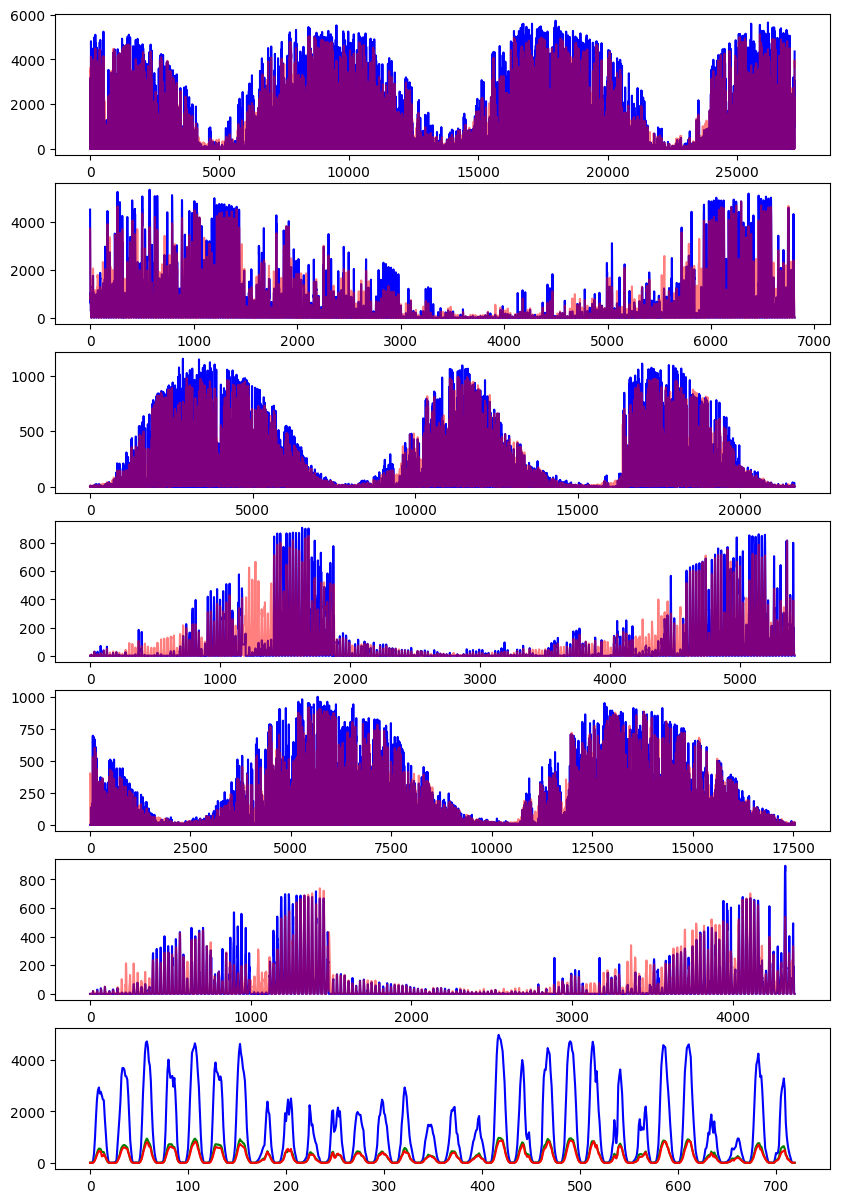

In [8]:
fig, axs = plt.subplots(7, figsize=(10, 15))

axs[0].plot(data.A.train_y, color="blue")
axs[0].plot(predictions_cb[0][0], color="red", alpha=0.5)

axs[1].plot(data.A.val_y, color="blue")
axs[1].plot(predictions_cb[0][1], color="red", alpha=0.5)

axs[2].plot(data.B.train_y, color="blue")
axs[2].plot(predictions_cb[1][0], color="red", alpha=0.5)

axs[3].plot(data.B.val_y, color="blue")
axs[3].plot(predictions_cb[1][1], color="red", alpha=0.5)

axs[4].plot(data.C.train_y, color="blue")
axs[4].plot(predictions_cb[2][0], color="red", alpha=0.5)

axs[5].plot(data.C.val_y, color="blue")
axs[5].plot(predictions_cb[2][1], color="red", alpha=0.5)

axs[6].plot(predictions_cb[0][2], color="blue")
axs[6].plot(predictions_cb[1][2], color="green")
axs[6].plot(predictions_cb[2][2], color="red")

In [21]:
avg = np.empty(shape=(3,3), dtype=np.ndarray)


for building in range(3):
    for dataset in range(3):
        current = (predictions_xg[building][dataset] + predictions_cb [building][dataset]) / 2.0
        avg[building][dataset] = current
        

        


69.36823216482702


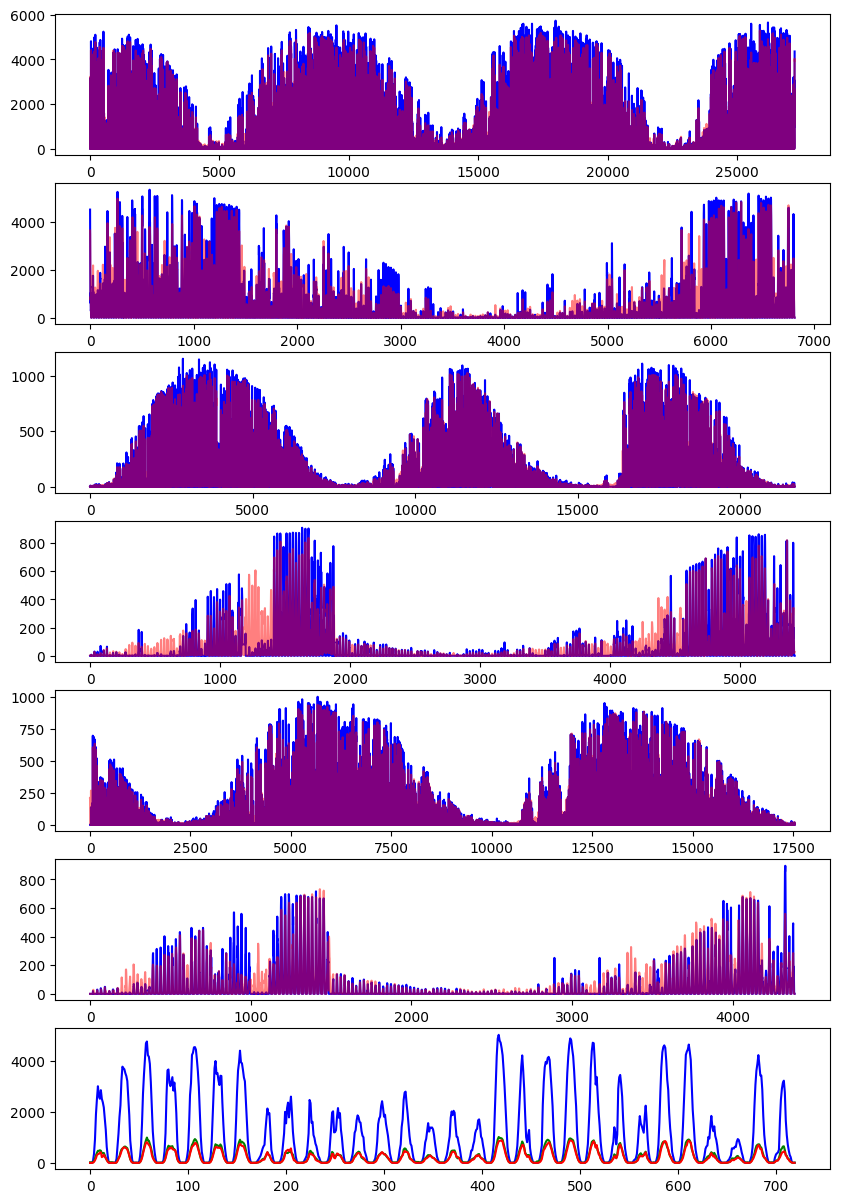

In [27]:
fig, axs = plt.subplots(7, figsize=(10, 15))

axs[0].plot(data.A.train_y, color="blue")
axs[0].plot(avg[0][0], color="red", alpha=0.5)

axs[1].plot(data.A.val_y, color="blue")
axs[1].plot(avg[0][1], color="red", alpha=0.5)

axs[2].plot(data.B.train_y, color="blue")
axs[2].plot(avg[1][0], color="red", alpha=0.5)

axs[3].plot(data.B.val_y, color="blue")
axs[3].plot(avg[1][1], color="red", alpha=0.5)

axs[4].plot(data.C.train_y, color="blue")
axs[4].plot(avg[2][0], color="red", alpha=0.5)

axs[5].plot(data.C.val_y, color="blue")
axs[5].plot(avg[2][1], color="red", alpha=0.5)

axs[6].plot(avg[0][2], color="blue")
axs[6].plot(avg[1][2], color="green")
axs[6].plot(avg[2][2], color="red")




mae_val_a = mean_absolute_error(data.A.val_y, avg[0][1])
mae_val_b = mean_absolute_error(data.B.val_y, avg[1][1])
mae_val_c = mean_absolute_error(data.C.val_y, avg[2][1])


print((mae_val_a + mae_val_b + mae_val_c) / 3)

In [28]:
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [29]:
submit = np.concatenate((np.concatenate((avg[0][2], avg[1][2])),avg[2][2]))

In [30]:
test['prediction'] = submit
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv("submissions/avg_1.csv", index=False)

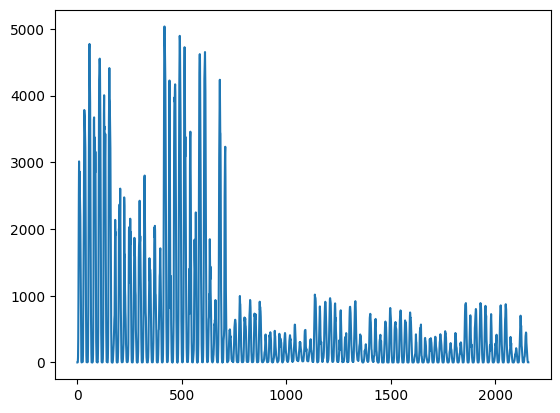

In [31]:
plt.plot(submit)